In [2]:
import numpy as np
from bertopic import BERTopic
from umap import UMAP
from transformers.pipelines import pipeline

In [5]:
# step1 加载文件
dataID='660b3ac5000000001a0110a8'
with open('data/xhs/'+dataID+'/cutword.txt', 'r', encoding='utf-8') as file:
  docs = file.readlines()
print('文档条数: ', len(docs))
print('预览第一条: ', docs[0])

文档条数:  22712
预览第一条:  ⃒ ⃘ ⃤



#创建词向量模型#

这里生成的词向量模型和emb.npy中生成的是相同的

哈工大模型使用全词掩码  
原始文本：使用语言模型来预测下一个词的probability   
全词Mask：使用语言[MASK]来[MASK]下一个词的[MASK][MASK][MASK]

In [6]:
embedding_model = pipeline(
  "feature-extraction",
  model="bert-base-chinese",
  # model="hfl/chinese-bert-wwm",
)
embedding_model

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

In [7]:
embeddings=np.load('emb.npy')
print(type(embeddings),embeddings.shape)

<class 'numpy.ndarray'> (22712, 768)


In [15]:
topic_model=BERTopic(
    embedding_model=embedding_model,
    min_topic_size=10,
    verbose=True
)
topic_model.fit_transform(docs,embeddings=embeddings)

2024-08-16 16:55:17,384 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-08-16 16:55:35,511 - BERTopic - Dimensionality - Completed ✓
2024-08-16 16:55:35,513 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-16 16:55:37,354 - BERTopic - Cluster - Completed ✓
2024-08-16 16:55:37,361 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-16 16:55:37,584 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,20,91,20_设置_限额_付费_dan模式,"[设置, 限额, 付费, dan模式, 正版, 真好, 转换成, 迫切, 哪调, 葛花]","[设置\n, 想 模式 设置\n, 设置\n]"


In [35]:
topic_info=topic_model.get_topic_info()
topic_info

,Topic,Count,Name,Representation,Representative_Docs
0,-1,8117,-1_中文_ai_声音_感觉,"[中文, ai, 声音, 感觉, 喜欢, 真的, 好像, 脏话, 看过, 视频]","[哈哈哈 说 中文 真的 哈哈哈\n, AI 真的 真人 哭惹R\n, 啊啊啊 中文 声音 ..."
1,0,2203,0_哈哈哈_布鲁路__,"[哈哈哈, 布鲁路, , , , , , , , ]","[哈哈哈\n, 哈哈哈\n, 哈哈哈\n]"
2,1,535,1_doge_男朋友_英语_牛马,"[doge, 男朋友, 英语, 牛马, 文明, 保姆, 模拟, 做牛做马, 发克, 无情]","[doge\n, 爱 听 想 doge\n, 陪 doge\n]"
3,2,393,2_笑死_收藏_早就_天天,"[笑死, 收藏, 早就, 天天, 中文, , , , , ]","[笑死\n, 笑死\n, 笑死\n]"
4,3,292,3_生气r_捂脸r_哭惹r_笑哭r,"[生气r, 捂脸r, 哭惹r, 笑哭r, 扶墙r, 抓狂r, 失望r, 大笑r, 色色r, ...","[捂脸R 哭惹R 哭惹R\n, 没 视频 生气R 生气R 生气R\n, 换 生气R 生气R ..."
...,...,...,...,...,...
363,362,10,362_一默_真有_好听_磁性,"[一默, 真有, 好听, 磁性, 声音, omg, 好凶, 确实, dan, 暴躁]","[声音 挺 好听 哈哈哈\n, 哈哈哈 声音 真有 磁性\n, 哈哈哈 幽 一默 声音 真的..."
364,363,10,363_哥们儿_刚看_笑裂_笑死,"[哥们儿, 刚看, 笑裂, 笑死, 哈哈哈, , , , , ]","[完 笑死\n, 哈哈哈 笑裂 完\n, 哥们儿 刚看 完\n]"
365,364,10,364_听得懂_好玩_好帅_,"[听得懂, 好玩, 好帅, , , , , , , ]","[好玩\n, 好玩\n, 听得懂\n]"
366,365,10,365_别信_指南_解压_发疯,"[别信, 指南, 解压, 发疯, 觉醒, 机器, 傲娇, 暗中观察r, 怀疑, 调教]","[Ai 觉醒 偷笑R\n, 假 别信 偷笑R\n, 发疯 解压 指南 暗中观察R\n]"


hfl/chinese-bert-wwm 的结果  
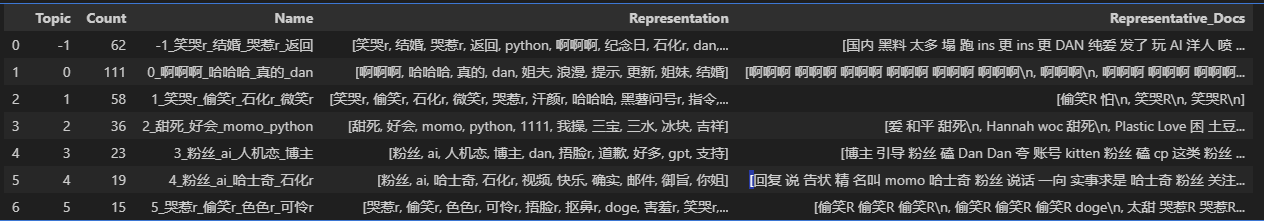  
bert-base-chinese的结果  
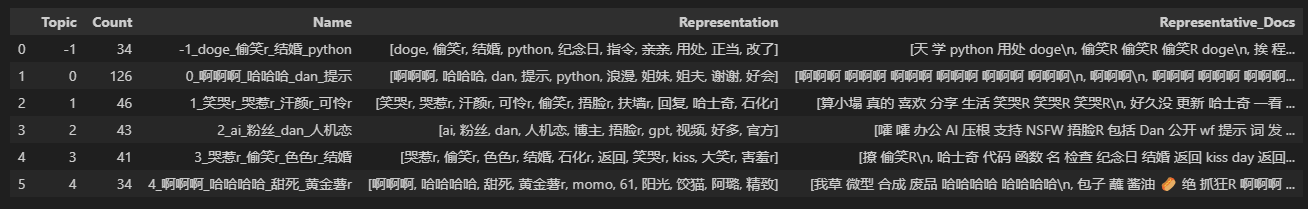

UMAP可视化

In [26]:
reduced_embeddings=UMAP(n_neighbors=10,n_components=2,min_dist=0.0,metric='cosine',).fit_transform(embeddings)
topic_model.visualize_documents(docs,reduced_embeddings=reduced_embeddings)